# Introduction to Clustering

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

wholesale_customers = fetch_ucirepo(id=292)

X = wholesale_customers.data.features

In [ ]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
escalador = StandardScaler()
X_scaled = escalador.fit_transform(X)

In [ ]:
modelo = KMeans(n_clusters=3,init='k-means++')
modelo.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
y_cluster = modelo.predict(X_scaled)

In [ ]:
import matplotlib.pyplot as plt

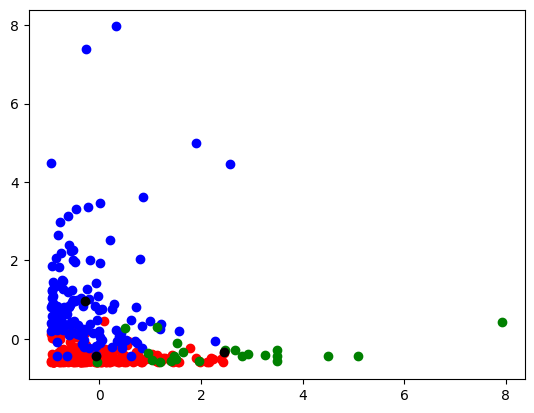

In [ ]:
plt.scatter(X_scaled[y_cluster == 0, 1], X_scaled[y_cluster == 0, 5], c='r')
plt.scatter(X_scaled[y_cluster == 1, 1], X_scaled[y_cluster == 1, 5], c='b')
plt.scatter(X_scaled[y_cluster == 2, 1], X_scaled[y_cluster == 2, 5], c='g')
plt.scatter(modelo.cluster_centers_[:, 1], modelo.cluster_centers_[:, 5], c='k')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
clusters = pca.transform(modelo.cluster_centers_)

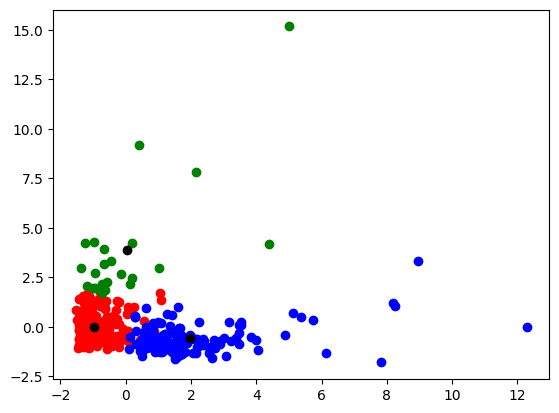

In [ ]:
plt.scatter(X_pca[y_cluster == 0, 0], X_pca[y_cluster == 0, 1], c='r')
plt.scatter(X_pca[y_cluster == 1, 0], X_pca[y_cluster == 1, 1], c='b')
plt.scatter(X_pca[y_cluster == 2, 0], X_pca[y_cluster == 2, 1], c='g')
plt.scatter(clusters[:, 0], clusters[:, 1], c='k')
plt.show()

# Score de silueta

$$ s(i) = \frac{b - a}{max(a, b)} $$

$b$: Distancia media entre un punto y todos los del cluster más cercano al que NO pertenece

$a$: La distancia media entre el punto y todos los del mismo cluster.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_scaled,y_cluster)

np.float64(0.4559807215517205)